# Supervised Learning: Regression of Housing Data

Here we'll do a short example of a regression problem: learning a continuous value
from a set of features.

We'll use the simple Boston house prices set, available in scikit-learn.  This
records measurements of 13 attributes of housing markets around Boston, as well
as the median price.  The question is: can you predict the price of a new
market given its attributes?

In [1]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.data.shape)
print(data.target.shape)

(506, 13)
(506,)


We can see that there are just over 500 data points.

The ``DESCR`` variable has a long description of the dataset:

In [25]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

It often helps to quickly visualize pieces of the data using histograms, scatter plots,
or other plot types.  Here we'll load pylab and show a histogram of the target values:
the median price in each neighborhood.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

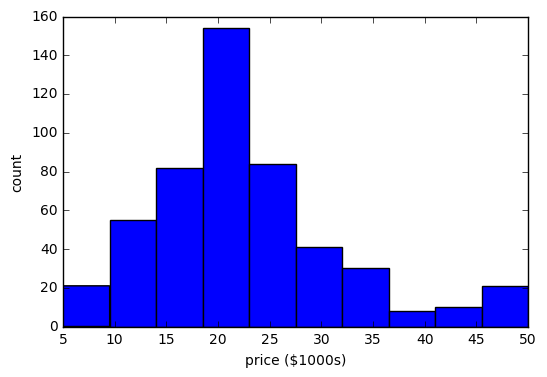

In [4]:
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')

Let's have a quick look to see if some features are more relevant than others for our problem

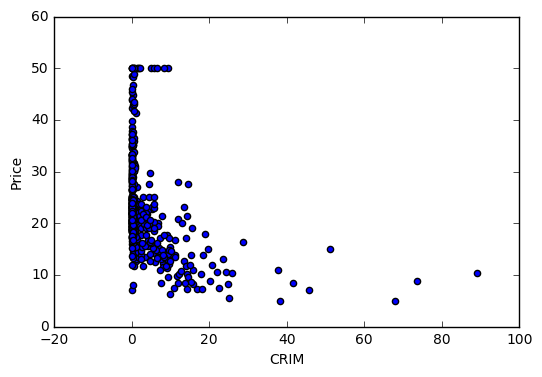

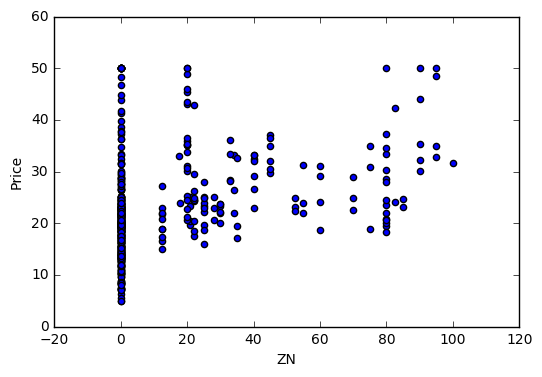

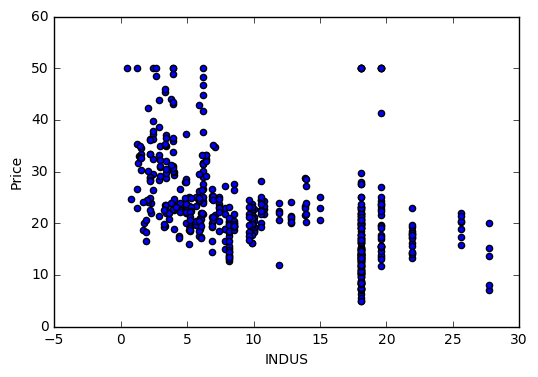

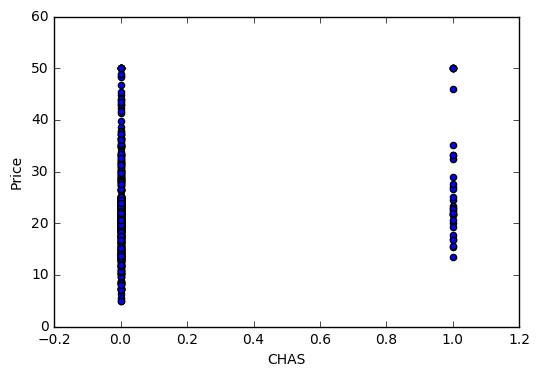

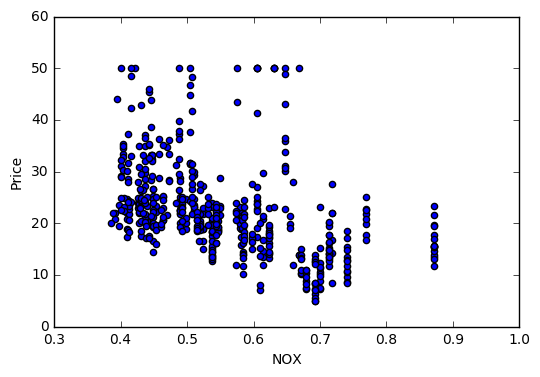

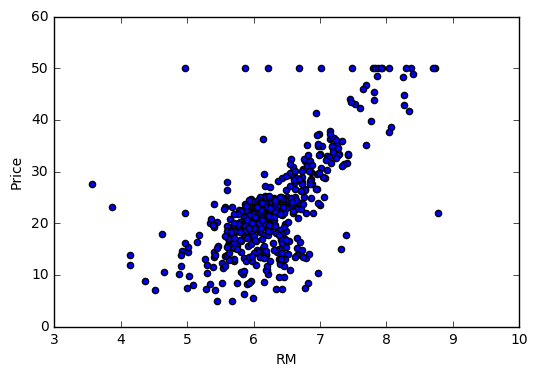

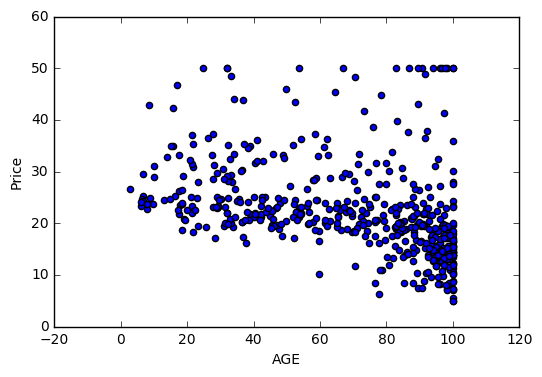

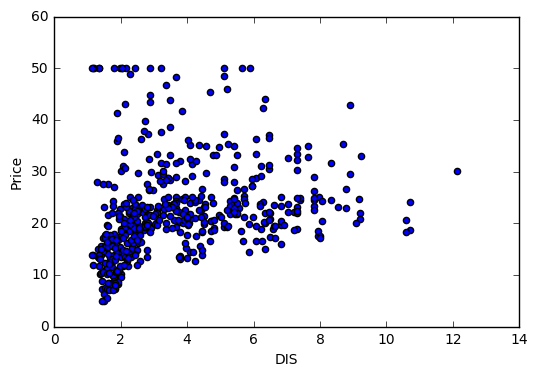

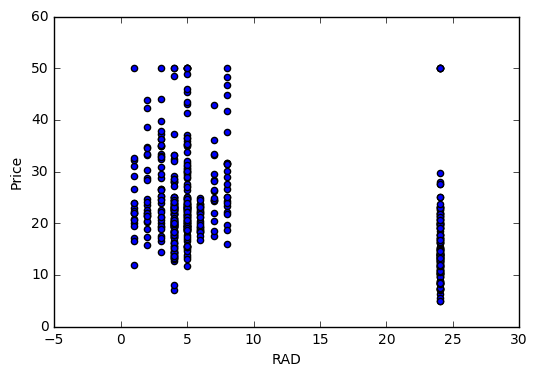

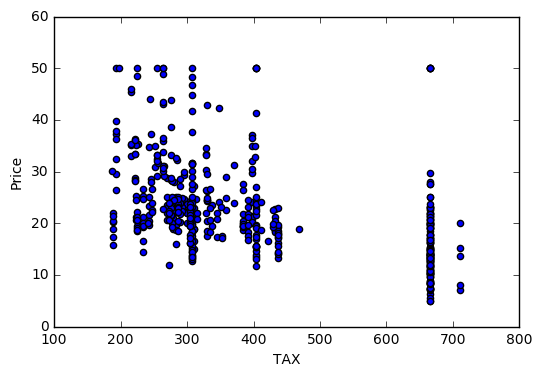

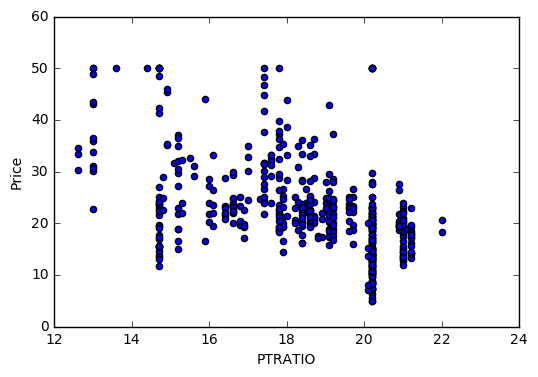

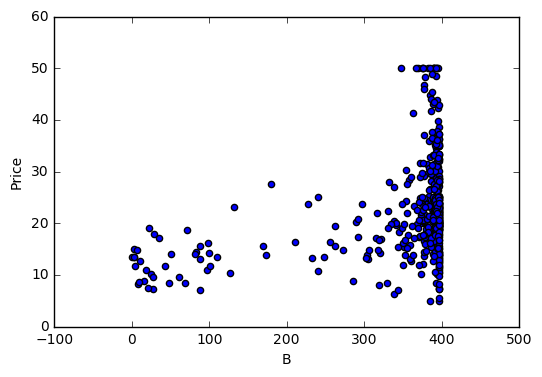

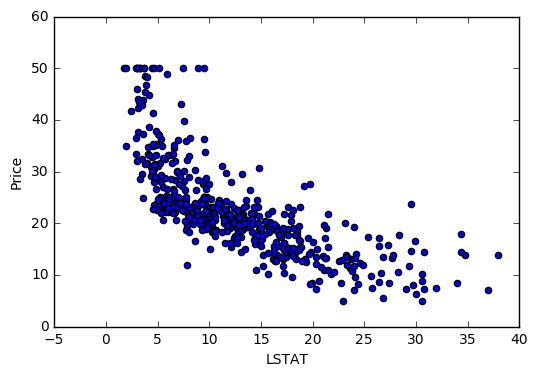

In [5]:
for index, feature_name in enumerate(data.feature_names):
    plt.figure()
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price')
    plt.xlabel(feature_name)


This is a manual version of a technique called **feature selection**.

Sometimes, in Machine Learning it is useful to use 
feature selection to decide which features are most useful for a
particular problem.  Automated methods exist which quantify this sort
of exercise of choosing the most informative features.

## Predicting Home Prices: a Simple Linear Regression

Now we'll use ``scikit-learn`` to perform a simple linear regression
on the housing data.  There are many possibilities of regressors to
use. A particularly simple one is ``LinearRegression``: this is
basically a wrapper around an ordinary least squares calculation.

We'll set it up like this:

In [6]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

/home/lesteve/miniconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
predicted = clf.predict(X_test)
expected = y_test

RMS: 3.54844826109


0.83974370983243873

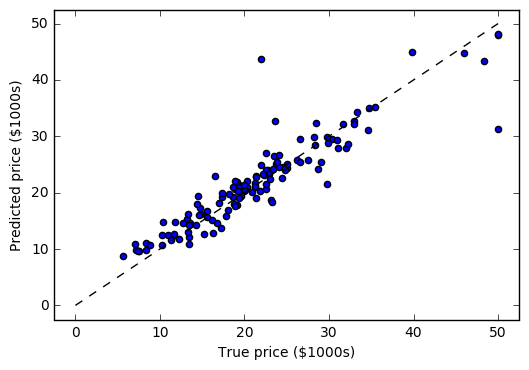

In [28]:
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((predicted - expected) ** 2)))
clf.score(X_test, y_test)

The prediction at least correlates with the true price, though there
are clearly some biases.  We could imagine evaluating the performance
of the regressor by, say, computing the RMS residuals between the
true and predicted price.  There are some subtleties in this, however,
which we'll cover in a later section.

## Exercise: Gradient Boosting Tree Regression

There are many other types of regressors available in scikit-learn:
we'll try a more powerful one here.

**Use the GradientBoostingRegressor class to fit the housing data**.

You can copy and paste some of the above code, replacing `LinearRegression`
with `GradientBoostingRegressor`.

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate the model, fit the results, and scatter in vs. out

### Solution:

RMS: 3.23683605219
0.866654140313


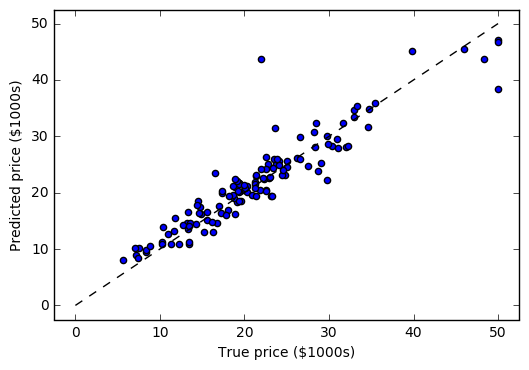

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((predicted - expected) ** 2)))
print(clf.score(X_test, y_test))


RMS: 3.54844826109


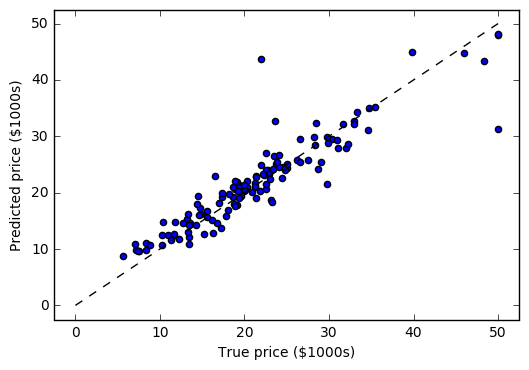

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,                                                               
          'learning_rate': 0.01, 'loss': 'ls'}                                                                                       
clf = GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((predicted - expected) ** 2)))

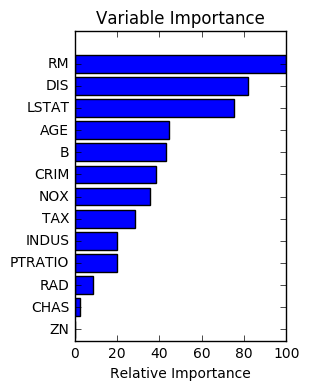

In [21]:
# Plot feature importance                                                                                                            
feature_importance = clf.feature_importances_                                                                                        
# make importances relative to max importance                                                                                        
feature_importance = 100.0 * (feature_importance / feature_importance.max())                                                         
sorted_idx = np.argsort(feature_importance)                                                                                          
pos = np.arange(sorted_idx.shape[0]) + .5                                                                                            
plt.subplot(1, 2, 2)                                                                                                                 
plt.barh(pos, feature_importance[sorted_idx], align='center')                                                                        
plt.yticks(pos, data.feature_names[sorted_idx])                                                                                    
plt.xlabel('Relative Importance')                                                                                                    
plt.title('Variable Importance')                                                                                                     
plt.show() 

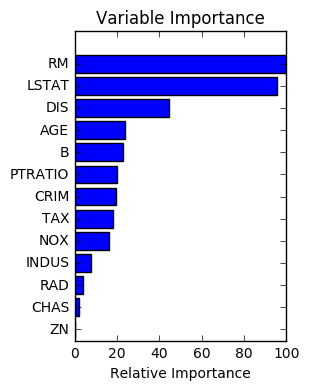

In [24]:
# Plot feature importance                                                                                                            
feature_importance = clf.feature_importances_                                                                                        
# make importances relative to max importance                                                                                        
feature_importance = 100.0 * (feature_importance / feature_importance.max())                                                         
sorted_idx = np.argsort(feature_importance)                                                                                          
pos = np.arange(sorted_idx.shape[0]) + .5                                                                                            
plt.subplot(1, 2, 2)                                                                                                                 
plt.barh(pos, feature_importance[sorted_idx], align='center')                                                                        
plt.yticks(pos, data.feature_names[sorted_idx])                                                                                    
plt.xlabel('Relative Importance')                                                                                                    
plt.title('Variable Importance')                                                                                                     
plt.show() 